In [1]:
!pip install tensorflow

In [1]:
!pip install tensorflow numpy

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
print(tf.__version__)  # Check TensorFlow version

2025-03-22 03:27:15.144200: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-22 03:27:16.503980: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-22 03:27:16.920286: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-22 03:27:19.996991: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-22 03:27:28.088070: W tensorflow/comp

2.17.0


In [3]:
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)
print("Label:", train_labels[0])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should

In [5]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data, maxlen=256, padding='post')
test_data = keras.preprocessing.sequence.pad_sequences(test_data, maxlen=256, padding='post')

In [6]:
model = keras.Sequential([
    keras.layers.Embedding(10000, 16, input_length=256),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

/anaconda/envs/azureml_py38_PT_TF/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

2025-03-22 03:30:24.105838: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [8]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

history = model.fit(partial_x_train, partial_y_train, epochs=40, batch_size=512, 
                    validation_data=(x_val, y_val), verbose=1)

Epoch 1/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.5355 - loss: 0.6918 - val_accuracy: 0.5390 - val_loss: 0.6845
Epoch 2/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6417 - loss: 0.6792 - val_accuracy: 0.7011 - val_loss: 0.6631
Epoch 3/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7226 - loss: 0.6539 - val_accuracy: 0.7490 - val_loss: 0.6301
Epoch 4/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7591 - loss: 0.6153 - val_accuracy: 0.7778 - val_loss: 0.5850
Epoch 5/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7992 - loss: 0.5638 - val_accuracy: 0.8045 - val_loss: 0.5354
Epoch 6/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8133 - loss: 0.5135 - val_accuracy: 0.8218 - val_loss: 0.4882
Epoch 7/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/st

In [9]:
results = model.evaluate(test_data, test_labels, verbose=2)
print("Test Loss, Test Accuracy:", results)

782/782 - 1s - 1ms/step - accuracy: 0.8520 - loss: 0.3641
Test Loss, Test Accuracy: [0.3641462028026581, 0.8520399928092957]


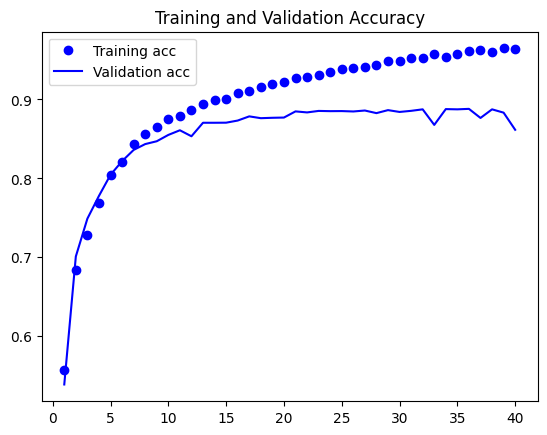

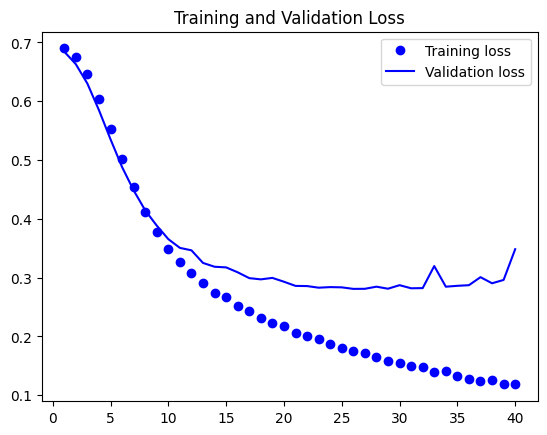

In [10]:
import matplotlib.pyplot as plt

history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [11]:
sample_review = test_data[0:1]  # Take the first test review
prediction = model.predict(sample_review)
print("Prediction (0 = negative, 1 = positive):", prediction[0])
print("Actual Label:", test_labels[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Prediction (0 = negative, 1 = positive): [0.38890046]
Actual Label: 0
